# Constrained optimization
**ECON2125/6012 Lecture 8**
Fedor Iskhakov

## Announcements & Reminders

- Submit Test 3 before **October 4, 23:59**

- The test will include the material from the last two lectures (unconstrained and constrained optimization) with some additional material on fundamentals of optimization from the lecture before (properties of optima and convexity)

- Next week you will have a guest lecture by [Dr. Esben Skriver Andersen](https://www.linkedin.com/in/esben-scriver-andersen-74159598/?originalSubdomain=au) who is a postdoc at RSE working on structural estimation of dynamic discrete choice and matching models \
Topic: numerical methods for practical optimization problems

```{image} _static/img/esben.jpeg
:scale: 40%
```


## Plan for this lecture

1. Constrained vs unconstrained optimization
2. Equality constrains and Lagrange method
3. Inequality constrains and Kuhn-Tucker method
4. Constrained optimization under convexity


**Supplementary reading:**
- Simon & Blume: 16.2, whole of chapter 18, 19.3
- Sundaram: chapters 5 and 6

## Setting up a constrained optimization problem

Let's start with recalling the definition of a general optimization problem

```{admonition} Definition
:class: caution

The general form of the optimization problem is

%
$$
V(\theta) 
= \max_{x} f(x,\theta)
\\
\text {subject to}
\\
g_i(x,\theta) = 0, \; i\in\{1,\dots,I\}\\
h_j(x,\theta) \le 0, \; j\in\{1,\dots,J\}
$$
%
where:
- $f(x,\theta) \colon \mathbb{R}^N \times \mathbb{R}^K \to \mathbb{R}$ is an objective function
- $x \in \mathbb{R}^N$ are decision/choice variables
- $\theta \in \mathbb{R}^K$ are parameters
- $g_i(x,\theta) = 0, \; i\in\{1,\dots,I\}$ where $g_i \colon \mathbb{R}^N \times \mathbb{R}^K \to \mathbb{R}$, are equality constraints
- $h_i(x,\theta) \le 0, \; i\in\{1,\dots,I\}$ where $h_i \colon \mathbb{R}^N \times \mathbb{R}^K \to \mathbb{R}$, are inequality constraints
- $V(\theta) \colon \mathbb{R}^K \to \mathbb{R}$ is a value function
```

Today we focus on the problem with constrants, i.e. $I+J>0$

The obvious classification that we follow 
- equality constrained problems, i.e. $I>0$, $J=0$
- inequality constrained problems, i.e. $J>0$, which can include equalities as special case

```{note}
Note that every optimization problem can be seen as *constrained* if we define the objective function to have the domain that coincides with the admissible set.
%
$$
\max_x f(x): \mathbb{R}^N \to \mathbb{R}
\\
\text {subject to}
\\
g_i(x) = 0, \; i\in\{1,\dots,I\}\\
h_j(x) \le 0, \; j\in\{1,\dots,J\}
$$
%
is equivalent to
%
$$
\max_x f(x): A \to \mathbb{R}
\\
A = \big\{x \in \mathbb{R}^N \colon g_i(x) = 0, \; i\in\{1,\dots,I\} \text{ and } h_j(x) \le 0, \; j\in\{1,\dots,J\}\big\}
$$
```




## Equality constrains and Lagrange method


### Constrained Optimization

A major focus of econ: the optimal allocation of scarce
resources

- *optimal* = optimization
- *scarce* = constrained

Standard constrained problems:

- Maximize utility given budget
- Maximize portfolio return given risk constraints
- Minimize cost given output requirement

```{admonition} Example
:class: tip

Maximization of utility subject to budget constraint

%
$$ 
%
\max u(x_1, x_2) \; \text{ such that } \; p_1 x_1 + p_2 x_2 \leq m 
%
$$
%
- $p_i$ is the price of good $i$, assumed $> 0$
- $m$ is the budget, assumed $> 0$
- $x_i \geq 0$ for $i = 1,2$
- let $u(x_1, x_2) = \alpha \log(x_1) + \beta \log(x_2)$, $\alpha>0$, $\beta>0$

```

```{figure} _static/plots/budget_set_1.png
:scale: 50%
:name: 

Budget set when, $p_1=1$, $p_2 = 1.2$, $m=4$
```

```{figure} _static/plots/budget_set_2.png
:scale: 50%
:name: 

Budget set when, $p_1=0.8$, $p_2 = 1.2$, $m=4$
```

```{figure} _static/plots/log_util.png
:scale: 50%
:name: 

Log utility with $\alpha=0.4$, $\beta=0.5$
```

```{figure} _static/plots/log_util_contour.png
:scale: 50%
:name: 

Log utility with $\alpha=0.4$, $\beta=0.5$
```

We seek a bundle $(x_1^\star, x_2^\star)$ that maximizes $u$ over
the budget set

That is,

%
$$
%
\alpha \log(x_1^\star) + \beta \log(x_2^\star)
\geq
\alpha \log(x_1) + \beta \log(x_2)
%
$$
%

for all $(x_1, x_2)$ satisfying $x_i \geq 0$ for each $i$ and 

%
$$
%
p_1 x_1 + p_2 x_2 \leq m
%
$$
%

Visually, here is the budget set and objective function:

```{figure} _static/plots/budget_set_3.png
:scale: 50%
:name: 

Utility max for $p_1=1$, $p_2 = 1.2$, $m=4$, $\alpha=0.4$,
$\beta=0.5$
```

First observation: $u(0, x_2) = u(x_1, 0) = u(0, 0) = -\infty$

- Hence we need consider only strictly positive bundles

Second observation: $u(x_1, x_2)$ is
strictly increasing in both $x_i$

- Never choose a point $(x_1, x_2)$ with $p_1 x_1 + p_2 x_2 < m$
- Otherwise can increase $u(x_1, x_2)$ by small change

Hence we can replace $\leq$ with $=$ in the constraint

%
$$
%
p_1 x_1 + p_2 x_2 \leq m
\quad \text{becomes} \quad
p_1 x_1 + p_2 x_2 = m
%
$$
%

Implication: Just search along the budget line

### Substitution Method

Substitute constraint into objective function

This changes 
%
$$ 
%
\max_{x_1, x_2} \left\{ \alpha \log(x_1) + \beta \log(x_2) \right\}
\text{ such that } \; p_1 x_1 + p_2 x_2 = m 
%
$$
%

into
%
$$ 
%
\max_{x_1} \left\{ \alpha \log(x_1) + \beta \log((m - p_1x_1) / p_2) \right\}
%
$$
%

Since all candidates satisfy $x_1 > 0$ and $x_2 > 0$, the domain is

%
$$ 0 < x_1 < \frac{m}{p_1} $$
%

```{figure} _static/plots/one_dim_budget.png
:scale: 50%
:name: 

Utility max for $p_1=1$, $p_2 = 1.2$, $m=4$, $\alpha=0.4$,
$\beta=0.5$
```

```{figure} _static/plots/log_util_budget_line.png
:scale: 50%
:name: 

Utility max for $p_1=1$, $p_2 = 1.2$, $m=4$, $\alpha=0.4$,
$\beta=0.5$
```

First order condition for
%
$$ 
%
\max_{x_1} \left\{ \alpha \log(x_1) + \beta \log((m - p_1x_1) / p_2) \right\}
%
$$
%
gives
%
$$
%
x_1^\star = \frac{\alpha}{\alpha + \beta} \cdot \frac{m}{p_1}
%
$$
%

**Exercise:** Verify

**Exercise:** Check second order condition (strict concavity)

Substituting into $p_1 x_1^\star + p_2 x_2^\star = m$ gives

%
$$
%
x_2^\star = \frac{\beta}{\beta + \alpha} \cdot \frac{m}{p_2}
%
$$
%

```{figure} _static/plots/log_util_optimizer.png
:scale: 50%
:name: 

Maximizer for $p_1=1$, $p_2 = 1.2$, $m=4$, $\alpha=0.4$,
$\beta=0.5$
```

### Substitution method: recipe

How to solve 
%
$$
%
\max_{x_1, x_2} \; f(x_1, x_2) 
\\
\text{ such that } g(x_1, x_2) = 0
%
$$
%

Steps:

1. Write constraint as $x_2 = h(x_1)$ for some function $h$

- Solve univariate problem $\max_{x_1} f(x_1, h(x_1))$ to get $x_1^\star$

9. Plug $x_1^\star$ into $x_2 = h(x_1)$ to get $x_2^\star$



**Limitations**: substitution doesn't always work

```{admonition} Example
:class: tip

Suppose that $g(x_1, x_2) = x_1^2 + x_2^2 - 1$

Step 1 from the cookbook says 

use $g(x_1, x_2) = 0$ to write $x_2$ as a function of $x_1$

But $x_2$ has two possible values for each $x_1 \in (-1, 1)$

%
$$
%
x_2 = \pm \sqrt{1 - x_1^2}
%
$$
%

In other words, $x_2$ is not a well defined function of $x_1$
```

As we meet more complicated constraints such problems intensify

- Constraint defines complex curve in $(x_1, x_2)$ space
- Inequality constraints, etc. 

We need more general, systematic approach


### Tangency

Consider again the problem

%
$$
\max_{x_1, x_2} \left\{ \alpha \log(x_1) + \beta \log(x_2) \right\}
\\ 
\text{ such that } p_1 x_1 + p_2 x_2 = m
$$
%

Turns out that the maximizer has the following property: 

- budget line is tangent to an indifference curve at maximizer

```{figure} _static/plots/log_util_maximizer_tangent.png
:scale: 50%
:name: 

Maximizer for $p_1=1$, $p_2 = 1.2$, $m=4$, $\alpha=0.4$,
$\beta=0.5$
```

In fact this is an instance of a general pattern

Notation: Let's call $(x_1, x_2)$ interior to the budget line if $x_i > 0$ for
$i=1,2$ (not a "corner" solution, see below)

In general, any interior maximizer $(x_1^\star, x_2^\star)$ of differentiable utility function $u$ has the property: budget line is tangent to a contour line at $(x_1^\star, x_2^\star)$

Otherwise we can do better:

```{figure} _static/plots/log_util_not_maximizer.png
:scale: 50%
:name: 

When tangency fails we can do better
```

Necessity of tangency often rules out a lot of points. We exploit this fact to 

- Build intuition
- Develop more general methods


````{admonition} Diversion: derivative of an implicit function

To continue with the tangency approach we need to know how to differentiate an implicit function $x_2(x_1)$ which is given by a contour line of the utility function $u(x_1, x_2)=c$

Let's approach this task in the following way

- utility function is given by $u \colon \mathbb{R}^2 \to \mathbb{R}$
- the contour line is given by $f(x_1,x_2) = c$ which defines an ***implicit function*** $x_1(x_2)$
- let map $g \colon \mathbb{R} \to \mathbb{R}^2$ given by $g(x_2) = \big[x_1(x_2),x_2\big]$


The total derivative of $f \circ g$ can be derived using the chain rule
%
$$
Dg(x_2) = 
\left(
\begin{array}{c}
\frac{d x_1}{d x_2} \\
1
\end{array}
\right)
\\
Df({\bf x}) = 
\left(
\frac{\partial f}{\partial x_1}({\bf x}),
\frac{\partial f}{\partial x_2}({\bf x})
\right) =
\big(f_1({\bf x}),f_2({\bf x})\big)
\\
D(f \circ g)({\bf x}) = Df({\bf x}) \cdot Dg({\bf x}) = 
f_1\big(g(x_2)\big) \frac{d x_1}{d x_2} + 
f_2\big(g(x_2)\big)
$$
%
Differentiating the equation $f(x_1,x_2) = c$ on both sides with respect to $x_2$ gives $D(f \circ g)({\bf x}) = 0$, thus leading to the final expression for the derivative of the implicit function
%
$$
\frac{d x_1}{d x_2}(x_2) = 
- \frac{f_2(x_1,x_2)}{f_1(x_1,x_2)} =
- \frac{f_2(x_1,x_2)}{f_1(x_1,x_2)}
$$
%
````


### Using Tangency: Relative Slope Conditions

Consider an equality constrained optimization problem where objective and constraint functions are differentiable:
%
$$
%
f(x_1, x_2) \longrightarrow \max_{x_1, x_2}
\\
\text{ such that } g(x_1, x_2) = 0
%
$$
%

How to develop necessary conditions for optima via tangency?

```{figure} _static/plots/tangency_1.png
:scale: 50%
:name: 

Contours for $f$ and $g$
```

```{figure} _static/plots/tangency_2.png
:scale: 50%
:name: 

Contours for $f$ and $g$
```

```{figure} _static/plots/tangency_3.png
:scale: 50%
:name: 

Tangency necessary for optimality
```

How do we locate an optimal $(x_1, x_2)$ pair?

```{figure} _static/plots/tangency_4.png
:scale: 50%
:name: 

Slope of contour lines
```

Let's choose $(x_1, x_2)$ to equalize the slopes

That is, choose $(x_1, x_2)$ to solve
%
$$
%
- \frac{f_1(x_1, x_2)} {f_2(x_1, x_2)}
= 
- \frac{g_1(x_1, x_2)} {g_2(x_1, x_2)}
%
$$
%

Equivalent:
%
$$
%
\frac{f_1(x_1, x_2)} {f_2(x_1, x_2)}
= 
\frac{g_1(x_1, x_2)} {g_2(x_1, x_2)}
%
$$
%

Also need to respect $g(x_1, x_2) = 0$

```{figure} _static/plots/tangency_5.png
:scale: 50%
:name: 

Condition for tangency
```

### Tangency condition algorithm

In summary, when $f$ and $g$ are both differentiable functions,
to find candidates for optima in 
%
$$
%
\max_{x_1, x_2} f(x_1, x_2) 
%
$$
%

%
$$
%
\text{ such that } \; g(x_1, x_2) = 0
%
$$
%

1. (Impose slope tangency) Set
%
$$
%
\frac{f_1(x_1, x_2)}{f_2(x_1, x_2)}
= \frac{g_1(x_1, x_2)}{g_2(x_1, x_2)}
%
$$
%

2. (Impose constraint) Set $g(x_1, x_2) = 0$

3. Solve simultaneously for $(x_1, x_2)$ pairs satisfying these conditions

```{admonition} Example
:class: tip

Consider again 
%
$$ 
%
\max_{x_1, x_2} \left\{ \alpha \log(x_1) + \beta \log(x_2) \right\}
%
$$
%

%
$$
%
\text{ such that } \; p_1 x_1 + p_2 x_2 - m = 0
%
$$
%

Then 
%
$$
%
\frac{f_1(x_1, x_2)}{f_2(x_1, x_2)}
= \frac{g_1(x_1, x_2)}{g_2(x_1, x_2)}
\quad \iff \quad
\frac{\alpha}{\beta} \frac{x_2}{x_1}
= \frac{p_1}{p_2}
%
$$
%

Solving simultaneously with $p_1 x_1 + p_2 x_2 = m$ gives
%
$$
%
x_1^\star = \frac{\alpha}{\alpha + \beta} \cdot \frac{m}{p_1}
\quad \text{and} \quad
x_2^\star = \frac{\beta}{\beta + \alpha} \cdot \frac{m}{p_2}
%
$$
%

Same as before...
```


### Slope Conditions for Minimization

Good news: The conditions are exactly the same

In particular: 

- Lack of tangency means not optimizer
- Constraint must be satisfied

```{figure} _static/plots/tangency_min_1.png
:scale: 50%
:name: 

Lack of tangency
```

```{figure} _static/plots/tangency_min_2.png
:scale: 50%
:name: 

Condition for tangency
```
### The method of Lagrange multipliers


```{admonition} Lagrange theorem
:class: important

Let $f \colon \mathbb{R}^N \to \mathbb{R}$ and $g \colon \mathbb{R}^N \to \mathbb{R}^K$ be continuously differentiable functions. 

Let $D = U \cap \{ {\bf x} \colon g_i({\bf x}) = 0, i=1,\dots,K \}$ where $U \subset \mathbb{R}^N$ is an open set.

Suppose that ${\bf x}^\star \in D$ is a local extremum of $f$ on $D$ and that the gradients of the constraint functions $g_i$ are linearly independent at ${\bf x}^\star$ (equivalently, the rank of the Jacobian matrix $Dg({\bf x}^\star)$ is equal to $K$)

Then there exists a vector $\lambda^\star \in \mathbb{R}^K$ such that
%
$$
Df({\bf x}^\star) - \lambda^\star \cdot Dg_i({\bf x}^\star) =
Df({\bf x}^\star) - \sum_{i=1}^K \lambda_i^\star Dg_i({\bf x}^\star) =
{\bf 0}
$$
```

````{admonition} Proof
:class: dropdown

See Sundaram 5.6, 5.7

````

```{note}
:class: caution

- $\lambda^\star$ is called the vector of **Lagrange multipliers**
- The assumption that the gradients of the constraint functions $g_i$ are linearly independent at ${\bf x}^\star$ is called the **constraint qualification** assumption
- Lagrange theorem provides ***necessary*** first order conditions for both maximum and minimum problems

```

```{admonition} Definition
:class: caution

The function $\mathcal{L} \colon \mathbb{R}^{N+K} \to \mathbb{R}$ defined as
%
$$
\mathcal{L}({\bf x},{\bf \lambda}) 
= f({\bf x}) - \lambda \cdot g_i({\bf x}) =
f({\bf x}) - \sum_{i=1}^K \lambda_i g_i({\bf x})
$$
%
is called a **Lagrangian** (function)

```

- Different sources define the Lagrangian with *minus or plus* in front of the second term: mathematically the two definitions are equivalent, but the choice of the sign affects the interpretation of the Lagrange multipliers
- I like to have a minus in the Lagrangian for consistency with the inequality constrained case where the sign is important
- We come back to this in lecture 10

```{admonition} Fact
:class: important

First order conditions for the Lagrangian coincide with the conditions in the Lagrange theorem, and together with the constraint qualification assumption they provide *necessary* first order conditions for the constrained optimization problem.

```

```{admonition} Example
:class: tip

%
$$ 
\max_{x_1, x_2} \left\{ \alpha \log(x_1) + \beta \log(x_2) \right\} \\
\text{ such that } \; p_1 x_1 + p_2 x_2 - m = 0
$$
%
Form the Lagrangian
%
$$ 
\mathcal{L}(x_1,x_2,\lambda) = \alpha \log(x_1) + \beta \log(x_2)
- \lambda(p_1 x_1 + p_2 x_2 - m)
$$
%

FOC
%
$$
\frac{\partial \mathcal{L}}{\partial x_1} = 0 \implies
\frac{\alpha}{x_1} - \lambda p_1 = 0\\
\frac{\partial \mathcal{L}}{\partial x_2} = 0 \implies
\frac{\beta}{x_2} - \lambda p_2 = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} = 0 \implies
x_1 p_1 + x_2 p_2 -m = 0
$$
%
From the first two equations we have $x_1 = \frac{\alpha}{\lambda p_1}$ and $x_2 = \frac{\beta}{\lambda p_2}$, and then from the third one $\frac{\alpha}{\lambda} + \frac{\beta}{\lambda} = m$.
This gives $\lambda = \frac{\alpha + \beta}{m}$, leading to the same result
%
$$
%
x_1^\star = \frac{\alpha}{\alpha + \beta} \cdot \frac{m}{p_1}
\quad \text{and} \quad
x_2^\star = \frac{\beta}{\beta + \alpha} \cdot \frac{m}{p_2}
%
$$
%

```

### Lagrangean as tangency condition

The "standard machine" for optimization with equality constraints

%
$$
%
\max_{x_1, x_2} f(x_1, x_2) 
\; \text{ such that } \;
g(x_1, x_2) = 0
%
$$
%

Set 
%
$$
%
\mathcal{L}(x_1, x_2, \lambda) := f(x_1, x_2) - \lambda g(x_1, x_2)
%
$$
%
and solve the system of
%
$$
\frac{\partial \mathcal{L}}{\partial x_1} = 0,
\quad
\frac{\partial \mathcal{L}}{\partial x_2} = 0,
\quad
\frac{\partial \mathcal{L}}{\partial \lambda} = 0
$$
%
We have
%
$$
\frac{\partial \mathcal{L}}{\partial x_i}(x_1, x_2, \lambda) = 0
\iff 
f_i(x_1, x_2) = - \lambda g_i(x_1, x_2), \; i=1,2
$$
%

Hence $\frac{\partial \mathcal{L}}{\partial x_1} = \frac{\partial \mathcal{L}}{\partial x_2} = 0$ gives
%
$$
%
\frac{f_1(x_1, x_2)}{f_2(x_1, x_2)}
= \frac{g_1(x_1, x_2)}{g_2(x_1, x_2)}
%
$$
%

Finally
%
$$
%
\frac{\partial \mathcal{L}}{\partial \lambda}(x_1, x_2, \lambda) = 0
\iff
g(x_1, x_2) = 0
%
$$
%

Hence the method leads us to the same conditions as the tangency condition method!


### Second order conditions

- similar to the unconstrained case, but applied to the Lagrangian
- have to do with **local optima** only
- similarly, provide sufficient conditions in the strict case, but only necessary conditions in the weak case

Using the rules of the differentiation from multivariate calculus we can express
the gradient and the Hessian of the Lagrangian w.r.t. ${\bf x}$ as
%
$$
\nabla_{\bf x} \mathcal{L}({\bf \lambda},{\bf x}) =
Df({\bf x}) - \lambda \cdot Dg({\bf x})\\
H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x}) =
Hf({\bf x}) - \lambda \cdot Hg({\bf x})
$$


```{admonition} Fact (necessary SOC)
:class: important

Let $f \colon \mathbb{R}^N \to \mathbb{R}$ and $g \colon \mathbb{R}^N \to \mathbb{R}^K$ be twice continuously differentiable functions ($C^2$) and
let $D = U \cap \{ {\bf x} \colon g_i({\bf x}) = 0, i=1,\dots,K \}$ where $U \subset \mathbb{R}^N$ is an open set.

Suppose ${\bf x}^\star \in D$ is the local constrained optimizer of $f$ on $D$ and that the constraint qualification assumption holds at ${\bf x}^\star$.

Then:

- If $f$ has a **local maximum** on $D$ at ${\bf x}^\star$, then $H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x})$ defined above is **negative semi-definite** on a linear constraint set $\{v: Dg({\bf x}^\star)\cdot v = {\bf 0}\}$, that is
%
$$
\forall v \in \mathbb{R}^N \text{ and } Dg({\bf x}^\star)\cdot v = {\bf 0} \implies
v' H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x}) v \le 0
$$
- If $f$ has a **local minimum** on $D$ at ${\bf x}^\star$, then $H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x})$ defined above is **positive semi-definite** on a linear constraint set $\{v: Dg({\bf x}^\star)\cdot v = {\bf 0}\}$, that is
%
$$
\forall v \in \mathbb{R}^N \text{ and } Dg({\bf x}^\star)\cdot v = {\bf 0} \implies
v' H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x}) v \ge 0
$$
```

```{admonition} Fact (sufficient SOC)
:class: important

Let $f \colon \mathbb{R}^N \to \mathbb{R}$ and $g \colon \mathbb{R}^N \to \mathbb{R}^K$ be twice continuously differentiable functions ($C^2$) and
let $D = U \cap \{ {\bf x} \colon g_i({\bf x}) = 0, i=1,\dots,K \}$ where $U \subset \mathbb{R}^N$ is an open set.

Suppose there exists ${\bf x}^\star \in D$ such that $\mathrm{rank}(Dg({\bf x}^\star)) = K$ and $Df({\bf x}^\star) - \lambda^\star \cdot Dg({\bf x}^\star) = {\bf 0}$ for some $\lambda^\star \in \mathbb{R}^K$ and the constraint qualification assumption holds at ${\bf x}^\star$ (FOC satisfied)

Then:

- If $H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x})$ defined above is **negative definite** on a linear constraint set $\{v: Dg({\bf x}^\star)\cdot v = {\bf 0}\}$, that is
%
$$
\forall v \ne {\bf 0} \text{ and } Dg({\bf x}^\star)\cdot v = {\bf 0} \implies
v' H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x}) v < 0,
$$
%
then ${\bf x}^\star$ is the **local constrained maximum** of $f$ on $D$

- If $H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x})$ defined above is **positive definite** on a linear constraint set $\{v: Dg({\bf x}^\star)\cdot v = {\bf 0}\}$, that is
%
$$
\forall v \ne {\bf 0} \text{ and } Dg({\bf x}^\star)\cdot v = {\bf 0} \implies
v' H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x}) v > 0
$$
then ${\bf x}^\star$ is the **local constrained minimum** of $f$ on $D$

```

Thus, the structure of both the necessary and the sufficient conditions is very similar to the unconstrained case.

The important difference is that the definiteness of the Hessian is checked on the linear constraint set $\{v: Dg({\bf x}^\star)\cdot v = {\bf 0}\}$ rather than on the whole $\mathbb{R}^N$.

The linear constraint set represents the tangent hyperplane to the constraint set at ${\bf x}^\star$.

*But how do we check for definiteness on a linear constraint set?*

```{admonition} Definition
:class: caution

The Hessian of the Lagrangian with respect to $(\lambda, {\bf x})$ is caleld a **bordered Hessian**, and is given by
%
$$
H \mathcal{L}({\bf \lambda},{\bf x}) =
\left(
\begin{array}{ll}
[{\bf 0}]_{K \times K} &
[-Dg({\bf x})]_{K \times N} \\
[-Dg({\bf x})]'_{N \times K} &
[Hf({\bf x}) - \lambda \cdot Hg({\bf x})]_{N \times N}
\end{array}
\right)
$$

```

Similarly to the Hessian w.r.t. ${\bf x}$ above, we can derive the bordered Hessian using the rules of the differentiation from multivariate calculus, differentiating the gradient of the Lagrangian w.r.t. $(\lambda,{\bf x})$ which is given
%
$$
\nabla \mathcal{L}({\bf \lambda},{\bf x}) =
\big(-g({\bf x}) \;, \; Df({\bf x}) - \lambda \cdot Dg({\bf x})\big)
$$

- The subscripts in the definition above denote the shape of the blocks in the bordered Hessian
- Some textbooks place the "boarder", i.e. Jacobians of the constrained in upper left corner and the Hessian w.r.t. ${\bf x}$ of the objective in the lower right corner, with corresponding changes in the propositions below
- the sign for the second term in the Lagrangian also appears and may differ between different texts

```{admonition} Definition
:class: caution

Consider a $n \times n$ matrix $A$ and let $0 < k \le n$.

The **leading principal minor** of order $k$ of $A$ is the determinant of a matrix obtained from $A$ by deleting its last $n-k$ rows and columns.

```

```{admonition} Example
:class: tip

$$
A = 
\left(
\begin{array}{ccc}
a_{11} & \cdots & a_{1n} \\
\vdots & \ddots & \vdots \\
a_{n1} & \cdots & a_{nn}
\end{array}
\right)
$$
%
The leading principal minors of oder $k = 1,\dots,n$ of $A$ are
%
$$
\begin{array}{l}
M_1 = \mathrm{det}(a_{11}) = a_{11} \\
M_2 = \mathrm{det}\left(
\begin{array}{cc}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{array}
\right)
= a_{11}a_{22} - a_{12}a_{21} \\
M_3 = \mathrm{det}\left(
\begin{array}{ccc}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{array}
\right)\\
\vdots \\
M_n = \mathrm{det}(A)
\end{array}
$$


```



```{admonition} Fact
:class: important

In the same settings as propositions above, namely for $f \colon \mathbb{R}^N \to \mathbb{R}$ and $g \colon \mathbb{R}^N \to \mathbb{R}^K$ twice continuously differentiable functions ($C^2$) and
$D = U \cap \{ {\bf x} \colon g_i({\bf x}) = 0, i=1,\dots,K \}$ where $U \subset \mathbb{R}^N$ is an open.

$H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x})$ is **negative semi-definite** on a linear constraint set $\{v: Dg({\bf x}^\star)\cdot v = {\bf 0}\}$
$\iff$ 
the last $N-K$ leading principal minors of $H \mathcal{L}({\bf \lambda},{\bf x})$ are zero or alternate in sign, with the sign of the full Hessian matrix equal to $(-1)^N$.

$H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x})$ is **positive semi-definite** on a linear constraint set $\{v: Dg({\bf x}^\star)\cdot v = {\bf 0}\}$
$\iff$ 
the last $N-K$ leading principal minors of $H \mathcal{L}({\bf \lambda},{\bf x})$ are zero or have the same sign as $(-1)^K$.

$H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x})$ is **negative definite** on a linear constraint set $\{v: Dg({\bf x}^\star)\cdot v = {\bf 0}\}$
$\iff$ 
the last $N-K$ leading principal minors of $H \mathcal{L}({\bf \lambda},{\bf x})$ are non-zero and alternate in sign, with the sign of the full Hessian matrix equal to $(-1)^N$.

$H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x})$ is **positive definite** on a linear constraint set $\{v: Dg({\bf x}^\star)\cdot v = {\bf 0}\}$
$\iff$ 
the last $N-K$ leading principal minors of $H \mathcal{L}({\bf \lambda},{\bf x})$ are non-zero and have the same sign as $(-1)^K$.

```

- Similarly to the unconstrained case, when none of the listed conditions for the bordered Hessian hold, it is ***indefinite*** and the point tested by the second order conditions is not a constrained optimizer.

````{admonition} Fact
:class: important

Determinant of $3 \times 3$ matrix can be computed by the **triangles rule**:
%
$$
\mathrm{det}
\left(
\begin{array}{ccc}
a_{11},& a_{12},& a_{13} \\
a_{21},& a_{22},& a_{23} \\
a_{31},& a_{32},& a_{33}
\end{array}
\right) =
\begin{array}{l}
+ a_{11}a_{22}a_{33} \\
+ a_{12}a_{23}a_{31} \\
+ a_{13}a_{21}a_{32} \\
- a_{13}a_{22}a_{31} \\
- a_{12}a_{21}a_{33} \\
- a_{11}a_{23}a_{32}
\end{array}
$$
%

```{figure} _static/img/det33.png
:scale: 100%
```

````


```{admonition} Example
:class: tip

Let's check the second order conditions for the consumer choice problem.

%
$$ 
\mathcal{L}(x_1,x_2,\lambda) = \alpha \log(x_1) + \beta \log(x_2)
- \lambda(p_1 x_1 + p_2 x_2 - m)
$$
%
$$
\nabla_{\bf x} \mathcal{L}({\bf \lambda},{\bf x}) =
\left(\frac{\alpha}{x_1} - \lambda p_1,\;
\frac{\beta}{x_2} - \lambda p_2\right)
$$
%
$$
H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x}) =
\left(
\begin{array}{cc}
-\frac{\alpha}{x_1^2},& 0 \\
0,& -\frac{\beta}{x_2^2}
\end{array}
\right)
$$
%
$$
\nabla \mathcal{L}({\bf \lambda},{\bf x}) =
\left(
x_1 p_1 + x_2 p_2 -m, \;
\frac{\alpha}{x_1} - \lambda p_1, \;
\frac{\beta}{x_2} - \lambda p_2
\right)
$$
%
$$
H\mathcal{L}({\bf \lambda},{\bf x}) =
\left(
\begin{array}{ccc}
0,& -p_1,& -p_2 \\
-p_1,& -\frac{\alpha}{x_1^2},& 0 \\
-p_2,& 0,& -\frac{\beta}{x_2^2}
\end{array}
\right)
$$
%
Solving FOC we have as before
%
$$
{\bf x}^\star = 
\left(
\frac{\alpha}{\alpha + \beta} \frac{m}{p_1}, \;
\frac{\beta}{\beta + \alpha} \frac{m}{p_2}
\right)
\text{ and }
\lambda^\star = \frac{\alpha+\beta}{m}
$$
%
To check the second order conditions compute the Hessian at ${\bf x}^\star$
%
$$
H\mathcal{L}({\bf \lambda}^\star,{\bf x}^\star) =
\left(
\begin{array}{ccc}
0,& -p_1,& -p_2 \\
-p_1,& -\frac{(\alpha+\beta)^2p_1^2}{\alpha m^2},& 0 \\
-p_2,& 0,& -\frac{(\alpha+\beta)^2p_2^2}{\beta m^2}
\end{array}
\right)
$$
%
Because $N=2$ and $K=1$ we need to check one last lead principle minor, which is the determinant of the whole $H\mathcal{L}({\bf \lambda}^\star,{\bf x}^\star)$.
Using the triangle rule for computing determinants of the $3 \times 3$ matrix, 
we have
%
$$
\mathrm{det}\left(H\mathcal{L}({\bf \lambda}^\star,{\bf x}^\star)\right)=
\frac{(\alpha+\beta)^2 p_1^2 p_2^2}{\alpha m^2} +
\frac{(\alpha+\beta)^2 p_1^2 p_2^2}{\beta m^2} =
\frac{(\alpha+\beta)^3 p_1^2 p_2^2}{\alpha \beta m^2} >0
$$
%
We have that the determinant of the bordered Hessian has the same sign as $(-1)^N$, and the condition for sign alternation is satisified for $N-K = 1$ last leading principal minors.

Hence, $H_{\bf x} \mathcal{L}({\bf \lambda},{\bf x})$ is negative definite, implying that ${\bf x}^\star$ is the local constrained maximum of $f$ on $D$
by the sufficient second order condition.

```

### Lagrangian method: recipe

1. Write down the Lagrangian function $\mathcal{L}({\bf x},{\bf \lambda})$
2. Find all stationary points of $\mathcal{L}({\bf x},{\bf \lambda})$ with respect to ${\bf x}$ and ${\bf \lambda}$, i.e. solve the system of first order equations
3. Derive the bordered Hessian $H \mathcal{L}({\bf x},{\bf \lambda})$ and compute it value at the stationary points
4. Using second order conditions, check if the stationary points are local optima
3. Compare the function values at all identified local optima to find the global one

- in practice second order conditions (steps 3 and 4) may be skipped when for example the global shape of the function is known (convex case)

### When does Lagrange method fail?

```{admonition} Example
:class: tip

%
$$
f(x,y) = -y \to \max_{x,y}
\\
\text {subject to}
\\
g(x,y) = y^3 -x^2 = 0
$$
%
Proceed according to the Lagrange recipe
%
$$ 
\mathcal{L}(x,y,\lambda) = -y -\lambda(y^3 -x^2)
$$
%
$$
\nabla \mathcal{L}(x,y,\lambda) =
\left(x^2-y^3,\; 2x\lambda,\; -3y^2\lambda-1
\right)
$$
%
The FOC system of equations
%
$$
\begin{cases}
2x\lambda =0 \\
3y^2\lambda+1=0 \\
x^2-y^3 =0
\end{cases}
$$
%
does not have solutions! From second equation $\lambda \ne 0$, then from the first equation $x=0$, and so $y=0$ from the thrid, but then the second equation is not satisfied.

However, we can deduce that $(x^\star,y^\star)=(0,0)$ is a maximizer in the following way. For all points $(x,y)$ which satisfy the constraint $y^3 \ge 0$ because $x^2 \ge 0$, and thus the maximum attainable value is $f(x,y)=0$ which it takes at $(0,0)$.

*Why does Lagrange method fail?*

%
$$
\nabla g(x,y) = (2x,-3y^2)\\
\nabla g(x^\star,y^\star) = (0,0)
$$
%

The Lagrange method fails because the constraint qualification assumption is not satisfied at $(0,0)$, i.e. the rank of Jacobian matrix of the constraints (one by two in this case) is zero which is less than the number of constraints $K$.

```

Lagrange method may not work when:

- Constraints qualification assumption is not satisfied at the stationary point
- FOC system of equations does not have solutions (thus no local optima)
- Saddle points -- second order conditions can help
- local optimizer is not a global one -- no way to check without studying analytic properties of each problem

Conclusion: great tool, but blind application may lead to wrong results!




## Inequality constrains and Kuhn-Tucker method

Turning now to the inequality constrained optimization problems

```{admonition} Example
:class: tip

Maximization of utility subject to budget constraint

%
$$ 
u(x_1, x_2) = \alpha x_1 + \beta \log(x_2) \to \max_{x_1, x_2} \\
\text{ subject to} \\
p_1 x_1 + p_2 x_2 \leq m \\
x_1 \geq 0, \; x_2 \geq 0
$$
%
- $p_i$ is the price of good $i$, assumed non-negative
- $m$ is the budget, assumed non-negative
- $\alpha>0$, $\beta>0$

Apply the Lagrange method neglecting the non-negativity requirement and assuming no money are wasted, and so the budget constraint binds:
%
$$
\mathcal{L}(x_1,x_2,\lambda) = \alpha x_1 + \beta\log(x_2) - \lambda (p_1 x_1 + p_2 x_2 -m)\\
$$
%
$$
\frac{\partial \mathcal{L}}{\partial x_1} = 0 \implies
\alpha - \lambda p_1 = 0\\
\frac{\partial \mathcal{L}}{\partial x_2} = 0 \implies
\frac{\beta}{x_2} - \lambda p_2 = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} = 0 \implies
x_1 p_1 + x_2 p_2 -m = 0
$$
%
Solving FOC, from the first equation we have $\lambda = \alpha/p_1$, then from the second equation $x_2 = \beta p_1/ \alpha p_2$ and from the third $x_1 = m/p_1 -\beta/\alpha$. This is the only stationary point.

Hence, for some admissible parameter values, for example, $\alpha=\beta=1$, $p_1=p_2=1$ and $m=0.4$ we can have the optimal level of consumption of good 1 to be negative!

```

```{figure} _static/plots/corner_sol.png
:name: 

Tangent point is infeasible
```

Interpretation: No interior solution 

Put differently
%
- Every interior point on the budget line is dominated by the infeasible solution
- Hence solution must be on the boundary

Since $x_2 = 0$ implies $x_1 + \log(x_2) = - \infty$, solution is 
%
- $x_1^\star = 0$
- $x_2^\star = m/p_2 = 0.4$

```{figure} _static/plots/corner_sol_2.png
:name: 

Corner solution
```

Let's look at the systematic solution approach where the corner solutions will emerge naturally when they are optimal.


```{admonition} Karush-Kuhn-Tucker conditions
:class: important

Let $f \colon \mathbb{R}^N \to \mathbb{R}$ and $g \colon \mathbb{R}^N \to \mathbb{R}^K$ be continuously differentiable functions. 

Let $D = U \cap \{ {\bf x} \colon g_i({\bf x}) \le 0, i=1,\dots,K \}$ where $U \subset \mathbb{R}^N$ is an open set.

Suppose that ${\bf x}^\star \in D$ is a local extremum of $f$ on $D$ and that the gradients of the constraint functions $g_i$ *corresponding to the binding constraints* are linearly independent at ${\bf x}^\star$ (equivalently, the rank of the matrix composed of the gradients of the binding constraints is equal to the number of binding constraints).

Then there exists a vector $\lambda^\star \in \mathbb{R}^K$ such that
%
$$
Df({\bf x}^\star) - \lambda^\star \cdot Dg_i({\bf x}^\star) =
Df({\bf x}^\star) - \sum_{i=1}^K \lambda_i^\star Dg_i({\bf x}^\star) =
{\bf 0}
$$
%
and 
%
$$
\lambda_i^\star \ge 0 \text{ with } \lambda_i^\star g_i({\bf x}^\star) =0 \; i=1,\dots,K
$$

```

````{admonition} Proof
:class: dropdown

See Sundaram 6.5

````

- Very similar to the Lagrange theorem, but now we have inequalities!
- The last set of conditions is called the **complementary slackness** conditions, and they play the following role:
    - if for a given $i$ $g_i({\bf x}^\star) = 0$, that is the $i$-th constraint is **binding** , then the corresponding $\lambda_i^\star > 0$ acts as a Lagrange multiplier for an equality constraint
    - if on the other hand for a given $i$ $g_i({\bf x}^\star) < 0$, the corresponding $\lambda_i^\star$ must be zero, removing the term with $Dg_i({\bf x}^\star)$ from the first condition
- This way the KKT conditions combine the unconstrained and equality constrained conditions in one


```{figure}  _static/img/KKTdiagram.png
:scale: 50%
:name: 

Binding and non-binding constraint at ${\bf x}^\star$
```

### Karush - Kuhn-Tucker method: recipe

Essentially the same as for the Lagrange method

1. Write down the Lagrangian function $\mathcal{L}({\bf x},{\bf \lambda})$
2. Solve the KKT first order conditions to find the stationary points of
 $\mathcal{L}({\bf x},{\bf \lambda})$ with respect to ${\bf x}$, together with the non-negativity of KKT multipliers and complimentary slackness conditions
3. Using second order conditions using the subset of binding constraints, check if the stationary points at the boundary are local optima. Similarly, using the second order conditions for the unconstrained problem to investigate the interior stationary points
3. Compare the function values at all identified local optima to find the global one

Possible issues with KKT method are similar to the Lagrange method:
- constraint qualification assumption
- existence of constrained optima
- local vs global optimality


```{admonition} Example
:class: tip

Returning to the utility maximization problem with budget constraint and non-negative consumption
%
$$ 
u(x_1, x_2) = \alpha x_1 + \beta \log(x_2) \to \max_{x_1, x_2} \\
\text{ subject to} \\
p_1 x_1 + p_2 x_2 \leq m \\
x_1 \geq 0, \; x_2 \geq 0
$$
%
Form the Lagrangian with 3 inequality constraints (have to flip the sign for non-negativity to stay within the general formulation)
%
$$
\mathcal{L}(x_1,x_2,\lambda_1,\lambda_2,\lambda_3) = \\
= \alpha x_1 + \beta\log(x_2)  - \lambda_1 (-x_1) - \lambda_2 (-x_2) - \lambda_3 (p_1 x_1 + p_2 x_2 -m) = \\
= \alpha x_1 + \beta\log(x_2) + \lambda_1 x_1+ \lambda_2 x_2 - \lambda_3 (p_1 x_1 + p_2 x_2 -m)
$$
%
The necessary KKT conditions are given by the following system of equations
%
$$
\begin{cases}
\frac{\partial \mathcal{L}}{\partial x_1} = 0 \implies
\alpha + \lambda_1 - \lambda_3 p_1 = 0 \\
\frac{\partial \mathcal{L}}{\partial x_2} = 0 \implies
\frac{\beta}{x_2} + \lambda_2 - \lambda_3 p_2 = 0 \\
\lambda_1 \ge 0 \text { and } \lambda_1 x_1 = 0 \\
\lambda_2 \ge 0 \text { and } \lambda_2 x_2 = 0 \\
\lambda_3 \ge 0 \text { and } \lambda_3 (x_1 p_1 + x_2 p_2 -m) = 0 \\
\end{cases}
$$
%
The KKT conditions can be solved systematically by considering all combinations of the multipliers:

1. $\lambda_1=\lambda_2=\lambda_3=0$ \
  The first equation becomes $\alpha = 0$ which is inconsistent with the initially set $\alpha>0$

2. $\lambda_1=\lambda_2=0, \; \lambda_3>0 \implies x_1 p_1 + x_2 p_2 -m = 0$ \
  This is the exact case we looked at with the Lagrange method ignoring the non-negativity conditions on consumption. The solution is $x_1^\star = \frac{m}{p_1} - \frac{\beta}{\alpha}$ and $x_2^\star = \frac{\beta p_1}{\alpha p_2}$ if it also holds that $x_1^\star >0$ and $x_2^\star >0$, i.e. $p_1/m < \alpha/\beta$

3. $\lambda_1=\lambda_3=0, \; \lambda_2>0 \implies x_2 = 0$ \
  The case of $x_2=0$ is outside of the domain of the utility function and could in fact be excluded from the start.

4. $\lambda_1=0, \;\lambda_2>0, \; \lambda_3>0 \implies x_2 = x_1$ and $p_1 + x_2 p_2 -m = 0$ \
  Inconsistent similarly to the previous case

5. $\lambda_1>0, \;\lambda_2 = \lambda_3 = 0 \implies x_1 = 0$ \
  The second equation becomes $\beta / x_2 = 0$ which is inconsistent with the $\beta>0$ and $x_2 \ne 0$

6. $\lambda_1>0, \;\lambda_2 = 0, \; \lambda_3 > 0 \implies x_1 = 0$ and $p_1 + x_2 p_2 -m = 0$ \
  We have the following system in this case
  %
  $$
  \begin{cases}
  \alpha + \lambda_1 - \lambda_3 p_1 = 0 \\
  \frac{\beta}{x_2} - \lambda_3 p_2 = 0 \\
  x_2 p_2 -m = 0
  \end{cases}
  $$
  %
  From the last equation $x_2 = m/p_2$, 
  combining the two last equations $\lambda_3 = \beta/m$,
  and from the first equation $\lambda_1 = \beta p_1/m - \alpha$.
  The solution holds conditional on $\lambda_1>0$, i.e. $p_1/m > \alpha/\beta$.

7. $\lambda_1>0, \;\lambda_2 > 0, \; \lambda_3 = 0 \implies x_1 = 0$ and $x_2 = 0$ \
  Inconsistent similar to case 3

8. $\lambda_1>0, \;\lambda_2 > 0, \; \lambda_3 > 0 \implies x_1 = x_2 = p_1 + x_2 p_2 -m = 0$ \
  Inconsistent similarly to the previous case

To summarize, the solution to the KKT conditions is given by the following cases (it's easy to see that the two solutions coincide for the equality in the parameter condition):
%
$$
\begin{cases}
x_1^\star = \frac{m}{p_1} - \frac{\beta}{\alpha}, \;
x_2^\star = \frac{\beta p_1}{\alpha p_2}, & 
\text{ if } p_1/m \le \alpha/\beta, \\
x_1^\star = 0, \;
x_2^\star = \frac{m}{p_2}, & 
\text{ if } p_1/m > \alpha/\beta \\
\end{cases}
$$
%
Thus, the corner solution is included in the solution set of the KKT conditions.

```



### Second order conditions

Nearly identical to the secondary order conditions in the equality constraints case, except written only for the constraints which are binding/active at ${\bf x}^\star$ under consideration.

```{admonition} Example
:class: tip

$$
f(x,y) = \frac{x^3}{3}-3y^2+5x-6xy \to \max_{x,y} \\
\text {subject to} \\
(x/4)^2 + (y/8)^2 \le 1,\\
x,y \in \mathbb{R}
$$

```

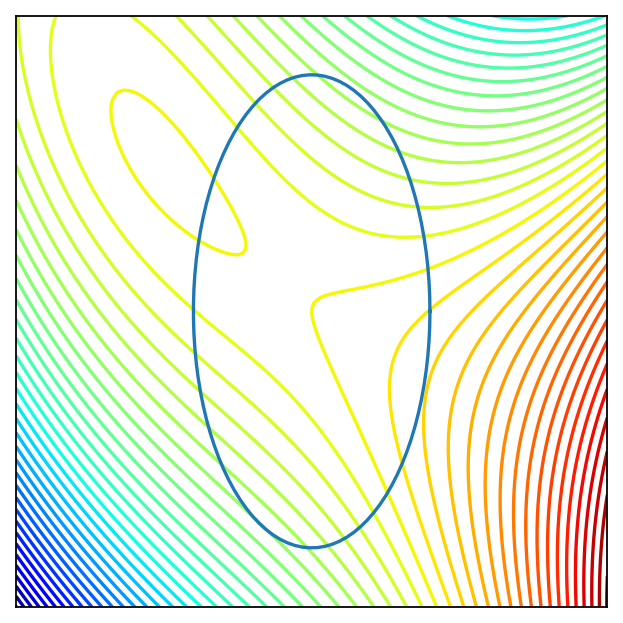

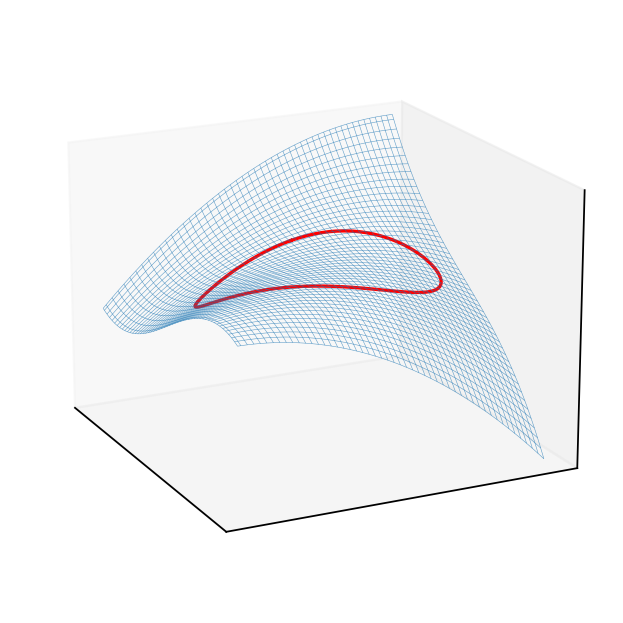

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

f = lambda x: x[0]**3/3 - 3*x[1]**2 + 5*x[0] - 6*x[0]*x[1]

x = y = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(x, y)
zs = np.array([f((x,y)) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

a,b=4,8
# (x/a)^2 + (y/b)^2 = 1
theta = np.linspace(0, 2 * np.pi, 100)
X1 = a*np.cos(theta)
Y1 = b*np.sin(theta)
zs = np.array([f((x,y)) for x,y in zip(np.ravel(X1), np.ravel(Y1))])
Z1 = zs.reshape(X1.shape)

fig = plt.figure(dpi=160)
ax2 = fig.add_subplot(111)
ax2.set_aspect('equal', 'box')
ax2.contour(X, Y, Z, 50,
            cmap=cm.jet)
ax2.plot(X1, Y1)
plt.setp(ax2, xticks=[],yticks=[])

fig = plt.figure(dpi=160)
ax3 = fig.add_subplot(111, projection='3d')
ax3.plot_wireframe(X, Y, Z, 
            rstride=2, 
            cstride=2,
            alpha=0.7,
            linewidth=0.25)
f0 = f(np.zeros((2)))+0.1
ax3.plot(X1, Y1, Z1, c='red')
plt.setp(ax3,xticks=[],yticks=[],zticks=[])
ax3.view_init(elev=18, azim=154)

plt.show()

## Extra material

Story of William Karush and his contribution the KKT theorem by Richard W Cottle ([download pdf](https://www.math.uni-bielefeld.de/documenta/vol-ismp/41_cottle-richard.pdf))